In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#PROBLEM
def dx_dt(x,y):
    return 1023*x + 2023*y
def dy_dt(x,y):
    return -1024*x - 2024*y

In [25]:
#SOLUTION

def y_true(t):
    return -(1024*np.exp(-1000*t)*(-1+np.exp(999*t)))/999

def x_true(t):
    return np.exp(-1000*t)*(-1024+2023*np.exp(999*t))/999

time_a = np.arange(0,0.125+1/4096,1/4096)

Explicit Euler method

In [26]:
def euler_explicit(x0, y0, start, stop, step):
    no_steps=int((stop-start)/step)
    x=np.empty(no_steps+1)
    y=np.empty(no_steps+1)
    x[0]=x0
    y[0]=y0
    for t in range(1,no_steps+1):
        x[t]=x[t-1]+step*dx_dt(x[t-1],y[t-1])
        y[t]=y[t-1]+step*dy_dt(x[t-1],y[t-1])
    return x, y

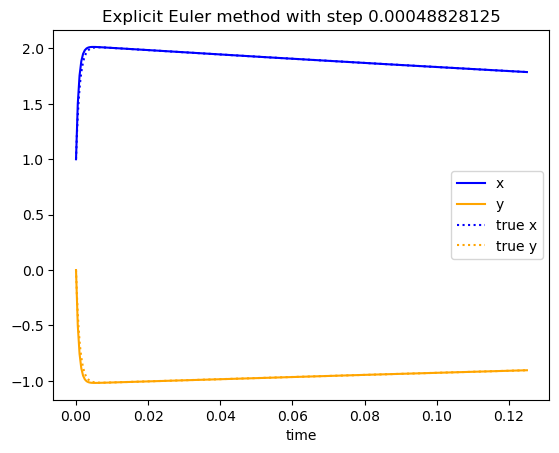

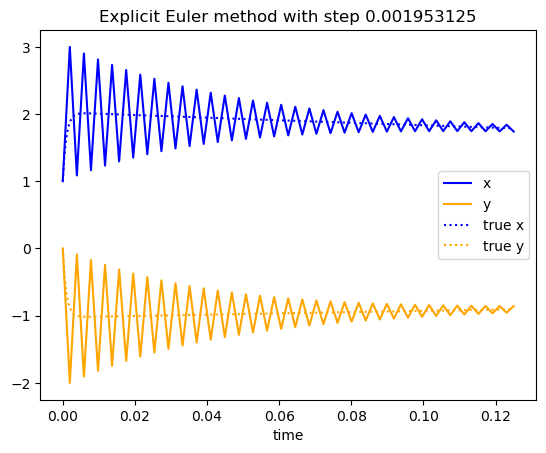

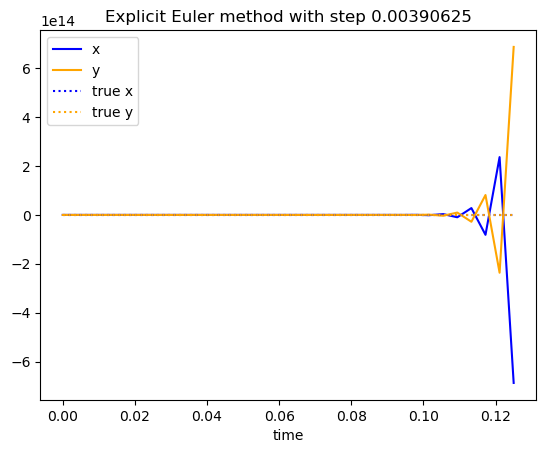

In [27]:
steps=[1/2048,1/512,1/256]
for s in steps:
    x1,y1=euler_explicit(1,0,0,0.125,s)
    time=np.arange(0,0.125+s,s)
    plt.plot(time,x1,label='x',color='blue')
    plt.plot(time,y1,label='y',color='orange')
    plt.plot(time_a,x_true(time_a),ls=':',color='blue',label='true x')
    plt.plot(time_a,y_true(time_a),ls=':',color='orange',label='true y')
    plt.xlabel('time')
    plt.legend()
    plt.title("Explicit Euler method with step "+str(s))
    plt.show()

Implicit Euler method

In [28]:
def euler_implicit(x0,y0,start,stop,step):
    #x[n]=x[n+1]*(1-step*1023)+y[n+1]*(-step*2023)
    #y[n]=x[n+1]*(step*1024)+y[n+1]*(1+step*2024)

    a = 1-step*1023
    b = -step*2023

    c = step*1024
    d = 1+step*2024

    den = a*d-b*c

    no_steps=int((stop-start)/step)
    x=np.empty(no_steps+1)
    y=np.empty(no_steps+1)
    x[0]=x0
    y[0]=y0
    for t in range(1,no_steps+1):
        x[t]=(d*x[t-1]-b*y[t-1])/den
        y[t]=(c*x[t-1]-a*y[t-1])/(-den)
    return x, y

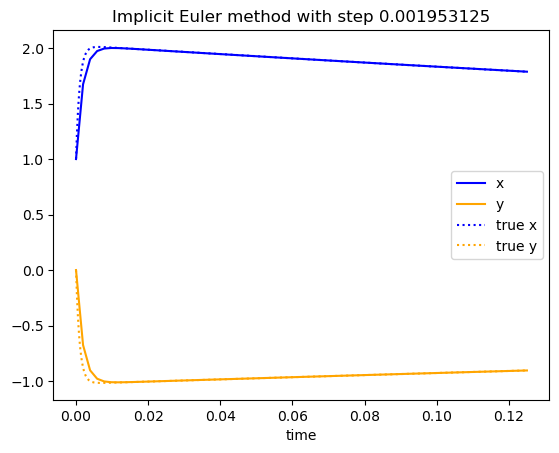

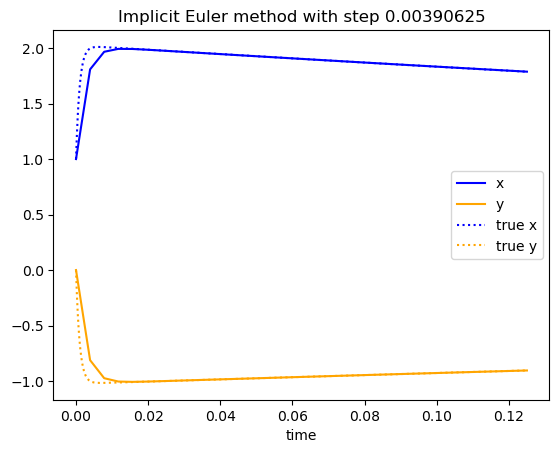

In [29]:
steps=[1/512,1/256]
for s in steps:
    x1,y1=euler_implicit(1,0,0,0.125,s)
    time=np.arange(0,0.125+s,s)
    plt.plot(time,x1,label='x',color='blue')
    plt.plot(time,y1,label='y',color='orange')
    plt.xlabel('time')
    plt.plot(time_a,x_true(time_a),label='true x',color='blue',ls=':')
    plt.plot(time_a,y_true(time_a),label='true y',color='orange',ls=':')
    plt.legend()
    plt.title("Implicit Euler method with step "+str(s))
    plt.show()

Explicit 4-step Runge-Kutta method

In [30]:
def runge_kutta(x0,y0,start,stop,step):
    no_steps=int((stop-start)/step)
    x=np.empty(no_steps+1)
    y=np.empty(no_steps+1)
    x[0]=x0
    y[0]=y0
    
    for t in range(1,no_steps+1):
        k1 = [dx_dt(x[t-1],y[t-1]),dy_dt(x[t-1],y[t-1])]
        k2 = [dx_dt(x[t-1]+0.5*step*k1[0],y[t-1]+0.5*step*k1[1]),dy_dt(x[t-1]+0.5*step*k1[0],y[t-1]+0.5*step*k1[1])]
        k3 = [dx_dt(x[t-1]+0.5*step*k2[0],y[t-1]+0.5*step*k2[1]),dy_dt(x[t-1]+0.5*step*k2[0],y[t-1]+0.5*step*k2[1])]
        k4 = [dx_dt(x[t-1]+step*k3[0],y[t-1]+step*k3[1]),dy_dt(x[t-1]+step*k3[0],y[t-1]+step*k3[1])]

        x[t]=x[t-1]+step*(k1[0]/6+k2[0]/3+k3[0]/3+k4[0]/6)
        y[t]=y[t-1]+step*(k1[1]/6+k2[1]/3+k3[1]/3+k4[1]/6)
    return x, y

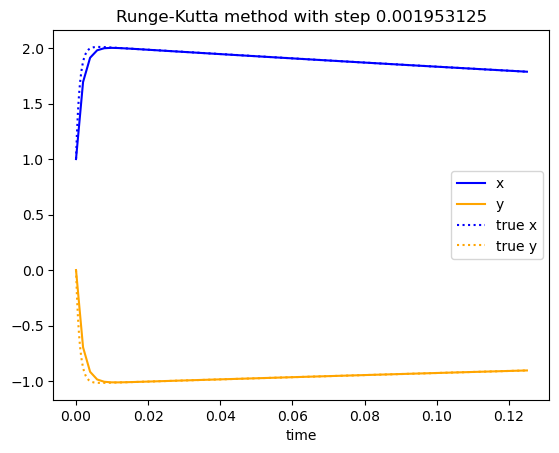

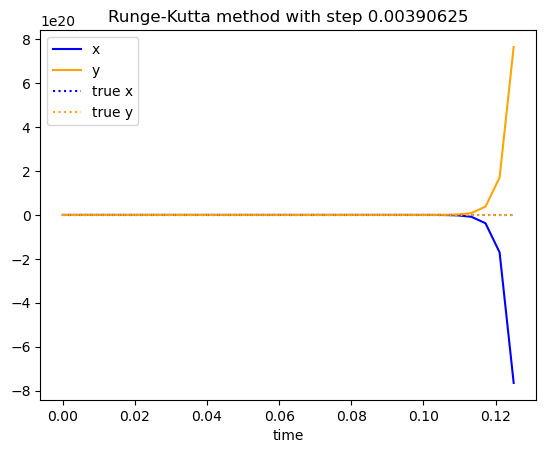

In [31]:
steps=[1/512,1/256]
for s in steps:
    x1,y1=runge_kutta(1,0,0,0.125,s)
    time=np.arange(0,0.125+s,s)
    plt.plot(time,x1,label='x',color='blue')
    plt.plot(time,y1,label='y',color='orange')
    plt.xlabel('time')
    plt.plot(time_a,x_true(time_a),label='true x',color='blue',ls=':')
    plt.plot(time_a,y_true(time_a),label='true y',color='orange',ls=':')
    plt.legend()
    plt.title("Runge-Kutta method with step "+str(s))
    plt.show()